In [56]:
import pandas as pd

In [57]:
from google.colab import files
files.upload()

Saving AER_credit_card_data.csv to AER_credit_card_data (1).csv


{'AER_credit_card_data.csv': b'card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active\nyes,0,37.66667,4.52,0.03326991,124.9833,yes,no,3,54,1,12\nyes,0,33.25,2.42,0.0052169420000000005,9.854167,no,no,3,34,1,13\nyes,0,33.66667,4.5,0.0041555559999999995,15.0,yes,no,4,58,1,5\nyes,0,30.5,2.54,0.06521378,137.8692,no,no,0,25,1,7\nyes,0,32.16667,9.7867,0.06705059,546.5033,yes,no,2,64,1,5\nyes,0,23.25,2.5,0.0444384,91.99667,no,no,0,54,1,1\nyes,0,27.91667,3.96,0.01257576,40.83333,no,no,2,7,1,5\nyes,0,29.16667,2.37,0.07643376,150.79,yes,no,0,77,1,3\nyes,0,37.0,3.8,0.2456279,777.8217,yes,no,0,97,1,6\nyes,0,28.41667,3.2,0.019780000000000002,52.58,no,no,0,65,1,18\nyes,0,30.5,3.95,0.07802456,256.6642,yes,no,1,24,1,20\nno,0,42.0,1.98,0.0006060605999999999,0.0,yes,no,2,36,1,0\nno,0,30.0,1.73,0.0006936416,0.0,yes,no,1,42,0,12\nyes,0,28.83333,2.45,0.03879551,78.87416999999999,yes,no,0,26,1,3\nyes,0,35.33333,1.9080000000000001,0.02690671,42.615,yes,no,2,120,0,5\nyes,0,

In [58]:
df = pd.read_csv("AER_credit_card_data.csv")

In [59]:
df

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,yes,0,33.58333,4.5660,0.002146,7.333333,yes,no,0,94,1,19
1315,no,5,23.91667,3.1920,0.000376,0.000000,no,no,3,12,1,5
1316,yes,0,40.58333,4.6000,0.026513,101.298300,yes,no,2,1,1,2
1317,yes,0,32.83333,3.7000,0.008999,26.996670,no,yes,0,60,1,7


In [60]:
col = ["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]


In [61]:

df['card'] = df['card'].apply(lambda x: 1 if x == "yes" else 0)



In [62]:
df.shape

(1319, 12)

In [63]:
df['card']

0       1
1       1
2       1
3       1
4       1
       ..
1314    1
1315    0
1316    1
1317    1
1318    1
Name: card, Length: 1319, dtype: int64

In [64]:
df.dtypes

card             int64
reports          int64
age            float64
income         float64
share          float64
expenditure    float64
owner           object
selfemp         object
dependents       int64
months           int64
majorcards       int64
active           int64
dtype: object

In [65]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
colu=["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]

df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)
X_train = df_train
X_val = df_val
X_test = df_test

y_train = X_train.card.values
y_val = X_val.card.values
y_test = X_test.card.values


del X_train['card']
del X_val['card']
del X_test['card']
X_train=X_train[colu]
X_val=X_val[colu]
X_test=X_test[colu]

In [66]:
y_train

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [67]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
columns = ["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active"]

X=X_train.copy()

for colm in columns :
    auc = roc_auc_score(y_train, X[colm])
    if auc < 0.5 :
        print(colm)
        print(roc_auc_score(y_train, -X[colm]))
    else:
        print(colm)
        print(auc)




reports
0.7166629860689376
age
0.5240020979407055
income
0.5908049467233478
share
0.989183643423692
expenditure
0.991042345276873
dependents
0.5327757227773791
months
0.5294217780967629
majorcards
0.5343859842838476
active
0.6043173411362006


# The most AUC score is at share

In [68]:
X=X_train.copy()
X_v=X_val.copy()
train_dicts = X[colu].to_dict(orient='records')

val_dicts = X_v[colu].to_dict(orient='records')
train_dicts[1]

{'reports': 1,
 'age': 32.33333,
 'income': 6.0,
 'share': 0.0002,
 'expenditure': 0.0,
 'dependents': 4,
 'months': 18,
 'majorcards': 1,
 'active': 4,
 'owner': 'yes',
 'selfemp': 'no'}

In [69]:
from sklearn.feature_extraction import DictVectorizer

dv=DictVectorizer(sparse = False)
train_dict=dv.fit_transform(train_dicts)
val_dict=dv.fit_transform(val_dicts)

In [70]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)


In [71]:
model.fit(train_dict, y_train)


LogisticRegression(max_iter=1000, solver='liblinear')

In [72]:
y_pred= model.predict(val_dict)
y_pred

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1])

In [99]:
score = roc_auc_score(y_val, y_pred)
score = round(score,3)
print (score)

0.994


# Question 3

In [84]:
import numpy as np
scores = []
thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    print(t)
    tp = ((y_pred >= t) & (y_val == 1)).sum()
    fp = ((y_pred >= t) & (y_val == 0)).sum()
    fn = ((y_pred < t) & (y_val == 1)).sum()
    tn = ((y_pred < t) & (y_val == 0)).sum()
    scores.append((t, tp, fp, fn, tn))

coln = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=coln)
    
  






0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35000000000000003
0.36
0.37
0.38
0.39
0.4
0.41000000000000003
0.42
0.43
0.44
0.45
0.46
0.47000000000000003
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.5700000000000001
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.6900000000000001
0.7000000000000001
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.8200000000000001
0.8300000000000001
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.9400000000000001
0.9500000000000001
0.96
0.97
0.98
0.99
1.0


In [85]:
df_scores[99:100]

,threshold,tp,fp,fn,tn
99,0.99,189,0,5,69


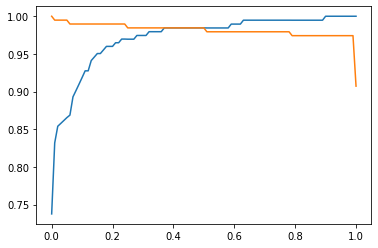

In [88]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
df_scores['pr'] = df_scores["tp"] / (df_scores["tp"] + df_scores["fp"])
df_scores['r'] = df_scores["tp"] / (df_scores["tp"]+ df_scores["fn"])


plt.plot(df_scores.threshold, df_scores['pr'], label='precision')
plt.plot(df_scores.threshold, df_scores['r'], label='recall')



In [90]:
intersection = df_scores.loc[df_scores['pr'] == df_scores['r']]
intersection

,threshold,tp,fp,fn,tn,tpr,fpr,pr,r
37,0.37,191,3,3,66,0.984536,0.043478,0.984536,0.984536
38,0.38,191,3,3,66,0.984536,0.043478,0.984536,0.984536
39,0.39,191,3,3,66,0.984536,0.043478,0.984536,0.984536
40,0.40,191,3,3,66,0.984536,0.043478,0.984536,0.984536
41,0.41,191,3,3,66,0.984536,0.043478,0.984536,0.984536
42,0.42,191,3,3,66,0.984536,0.043478,0.984536,0.984536
43,0.43,191,3,3,66,0.984536,0.043478,0.984536,0.984536
44,0.44,191,3,3,66,0.984536,0.043478,0.984536,0.984536
45,0.45,191,3,3,66,0.984536,0.043478,0.984536,0.984536
46,0.46,191,3,3,66,0.984536,0.043478,0.984536,0.984536


# nearest answer is 0.4

# Question 4

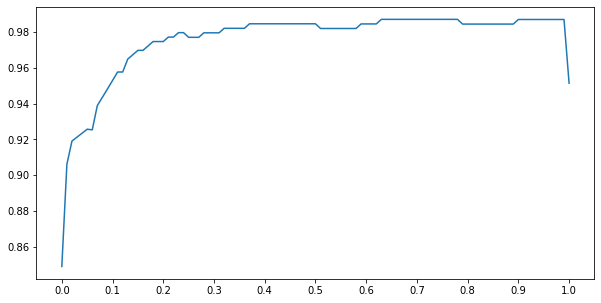

In [93]:
df_scores['f1'] = 2 * df_scores["pr"]* df_scores["r"] / (df_scores["pr"] + df_scores["r"])
plt.figure(figsize=(10, 5))

plt.plot(df_scores["threshold"], df_scores.f1)

plt.xticks(np.linspace(0, 1, 11))
plt.show()

In [94]:
df_s = df_scores.loc[df_scores['f1'].idxmax()] #Find values in df_score associated to maximum f1
df_s

threshold      0.630000
tp           190.000000
fp             1.000000
fn             4.000000
tn            68.000000
tpr            0.979381
fpr            0.014493
pr             0.994764
r              0.979381
f1             0.987013
Name: 63, dtype: float64

# Answer is 0.6

# Question 5


In [95]:
from sklearn.model_selection import KFold


def train(train_df, y_train,C):
    train_dicts = train_df[col].to_dict('records')
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dicts)
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000 )
    model.fit(X_train, y_train)
    return dv, model

def predict(val_train, dv, model):
    dicts = val_train[col].to_dict('records')
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]
    return y_pred




scores = []

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for train_idx, val_idx in kfold.split(df):
    df_train = df.iloc[train_idx]
    df_val = df.iloc[val_idx]

    y_train = df_train.card.values
    y_val = df_val.card.values

    dv, model = train(df_train, y_train,C=1.0)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.996 +- 0.002


# Nearest answer is 0.003

# Question 6

In [96]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for C in [0.01, 0.1, 1, 10]:
    scores = []

    for train_idx, val_idx in kfold.split(df[columns]):
        df_train = df.iloc[train_idx]
        df_val = df.iloc[val_idx]

        y_train = df_train.card.values
        y_val = df_val.card.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%4s, %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

C=0.01, 0.993 +- 0.004
C= 0.1, 0.995 +- 0.002
C=   1, 0.996 +- 0.002
C=  10, 0.996 +- 0.001


# Answer is 10

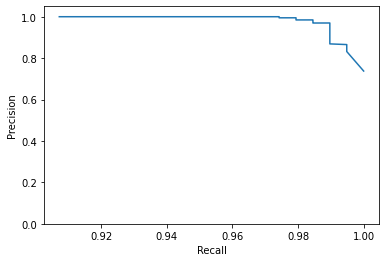

In [97]:
plt.plot(df_scores.r, df_scores.pr)

plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim(0, 1.05)
plt.show()

In [98]:
from sklearn.metrics import auc
df_scores = df_scores.dropna()
auc(df_scores.r, df_scores.pr)

0.09072557130870093